# Assessment

Engenharia de Prompts para Ciência de Dados

Pedro Monteiro Vieira Bayma Azevedo

## Imports

In [33]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import matplotlib.pyplot as plt
import json

import requests
import pandas as pd

In [3]:
#loading api key
load_dotenv('.env')

True

In [ ]:
#genai.configure(api_key=os.environ["GEMINI_KEY"])

## Exercício 1

### Fazer por Último

## Exercício 2

![Claude](./images/2-Claude.png)

![Gemini](./images/2-Gemini.png)



![GPT](./images/2-GPT.png)

### Respostas

#### a

O Claude tem como principais vantagens suas características mais voltadas para tarefas complexas e analíticas, bem como tarefas que envolvam código e escrita. Como desvantagem podemos apontar o tamanho da janela de contexto que é menor que o de outros LLMs e atualmente estar em versão de testes.


O Gemini Pro tem como principal vantagem sua capacidade multimodal que lida bem com textos, imagens, etc, e o custo menor quando comparado por exemplo ao GPT 4o. Com desvantagem podemos apontar sua menos consistência nas respostas e na capaxidade de compreender com precisão comandos quando comparado com outros modelos.

Por fim, o GPT 4o tem como vantagens o tamanho de sua janela de contexto, bem como sua performance de forma geral, podendo atuar em vários contextos. Como desvantagem, temos o custo elevado quando comparado a outros modelos e a necessidade de assinatura.


#### b 

Todas as respostas foram corretas. A resposta do Claude e do GPT foram extremamente próximas, tanto em conteúdo quanto em tamanho e temas abordados. Por sua vez a resposta do Gemini foi mais abrangente incluindo outras informações e foi um pouco maior que as outras duas.

#### c

Eu elejo a respsota do Claude como a mais próxima do esperado por ter atendido melhor aos requisitos de ser curta e trazer conteúdo que descrevia bem, de forma mais geral, o papel da Câmara dos Deputados.

#### d

![GPT](./images/2-Yaml.png)




 

## Exercício 3

### a - código dentro do arquivo dataprep.py

### b

In [17]:
pizzaPrompt = """

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com os dados dos deputados do brasil. Nesses dados temos informação na coluna
siglaPartido, do partido de cada deputado. 

### Instrução
Favor gerar código em python que crie um gráfico de pizza com o total e o percentual de cada deputado por partido.
Utilize as bibliotecas pandas, e matplotlib.

No fim, o código deve salvar o gráfico em um arquivo png com o nome de "distribuicao_deputados.png" no diretório
existente docs utilizando o seguinte path: "docs/distribuicao_deputados.png"

Favor retornar somente o código em python sem nehum comentário adicional

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(pizzaPrompt)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o arquivo parquet esteja no mesmo diretório ou especifique o caminho completo
df = pd.read_parquet("deputados.parquet")

# Contagem de deputados por partido
partidos = df['siglaPartido'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

# Salvando o gráfico
plt.savefig("docs/distribuicao_deputados.png")

plt.show()

```



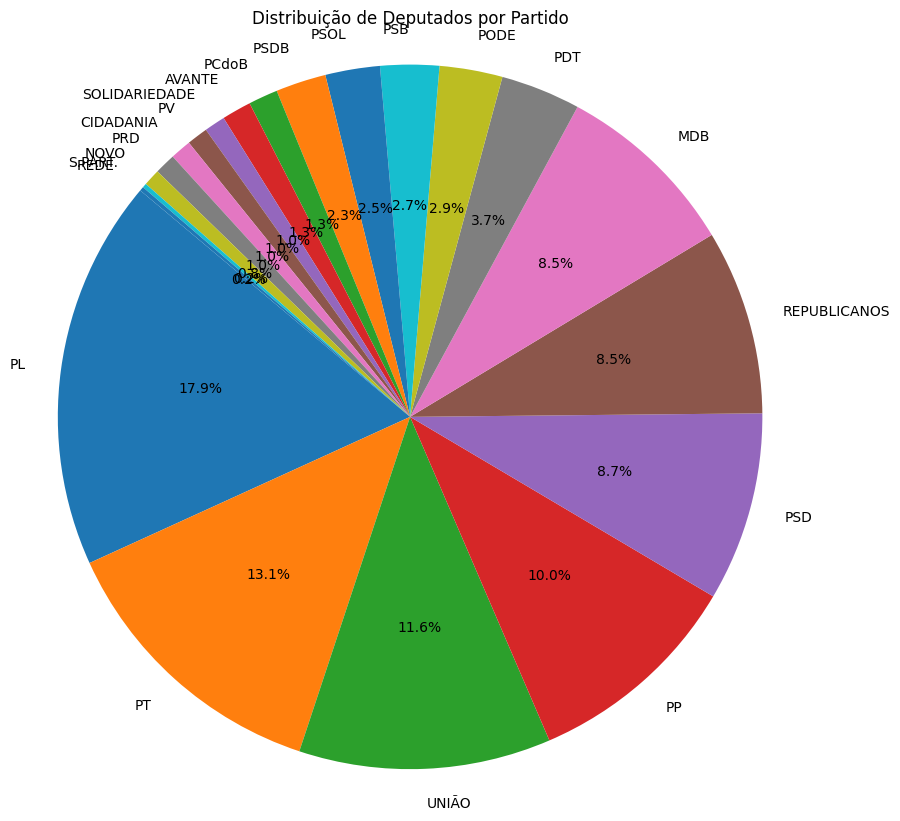

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o arquivo parquet esteja no mesmo diretório ou especifique o caminho completo
df = pd.read_parquet("./data/deputados.parquet")

# Contagem de deputados por partido
partidos = df['siglaPartido'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

# Salvando o gráfico
plt.savefig("docs/distribuicao_deputados.png")

plt.show()


### c

In [30]:
df = pd.read_parquet("./data/deputados.parquet")
partidos = df['siglaPartido'].value_counts()
partidos_texto = str(partidos.to_dict())




insightPartidosPrompt = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo texto com a distribuição dos deputados por partido.

### Instrução
Favor gerar insights a partir do dado {partidos_texto} sobre a distruibuição dos deputados por 
partido e como isso pode impactar o dia a dia da câmara dos deputados.

Favor retornar a análise em um formato json com a seguinte estrutura:
    
    ```json
    
        "insight1": "Insight 1",
        "insight2": "Insight 2",
        "insight3": "Insight 3"
    
    ```

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(insightPartidosPrompt)
print(response.text)

```json
{
  "insight1": "O PL possui uma expressiva maioria de deputados (93), representando um poder significativo na Câmara. Isso permite ao partido influenciar fortemente a pauta legislativa, liderar comissões importantes e negociar com mais força a aprovação de projetos de seu interesse.  Sua capacidade de formar blocos com partidos menores também é considerável.",
  "insight2": "A fragmentação partidária é significativa, com vários partidos possuindo representações pequenas a médias (UNIÃO, PP, PSD, REPUBLICANOS, MDB, PDT etc.). Esta fragmentação pode dificultar a formação de maiorias estáveis para aprovação de projetos de lei importantes, levando a negociações complexas e prolongadas, além de maior risco de instabilidade política.",
  "insight3": "A formação de blocos e coalizões será fundamental para a governabilidade.  Partidos menores podem desempenhar um papel crucial na formação de maiorias, exercendo um poder de barganha proporcionalmente maior à sua representação individua

In [ ]:
clean_response= response.text.replace("```json\n",'').replace("\n```",'')
clean_response = bytes(clean_response, "utf-8").decode("unicode_escape")
insights = json.loads(clean_response)


with open("./data/insights_distribuicao_deputados.json", "w", encoding="latin1") as file:
    json.dump(insights, file, indent=4)





In [ ]:
clean_response= response.text.replace("```json\n",'').replace("\n```",'')


In [35]:
classification

{'insight1': 'O PL possui uma expressiva maioria de deputados (93), representando um poder significativo na Câmara. Isso permite ao partido influenciar fortemente a pauta legislativa, liderar comissões importantes e negociar com mais força a aprovação de projetos de seu interesse.  Sua capacidade de formar blocos com partidos menores também é considerável.',
 'insight2': 'A fragmentação partidária é significativa, com vários partidos possuindo representações pequenas a médias (UNIÃO, PP, PSD, REPUBLICANOS, MDB, PDT etc.). Esta fragmentação pode dificultar a formação de maiorias estáveis para aprovação de projetos de lei importantes, levando a negociações complexas e prolongadas, além de maior risco de instabilidade política.',
 'insight3': 'A formação de blocos e coalizões será fundamental para a governabilidade.  Partidos menores podem desempenhar um papel crucial na formação de maiorias, exercendo um poder de barganha proporcionalmente maior à sua representação individual.  A dinâmic